Sun (single rotating star)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.0 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.0,<2.1"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_star(starA='sun')

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Setting Parameters
-----------------------

In [3]:
print b['sun']

ParameterSet: 21 parameters
             rpole@sun@component: 1.0 solRad
*              pot@sun@component: 1.0
              teff@sun@component: 6000.0 K
              abun@sun@component: 0.0
           syncpar@sun@component: 1.0
            period@sun@component: 1.0 d
*             freq@sun@component: 6.283185 rad / d
              incl@sun@component: 90.0 deg
         gravb_bol@sun@component: 0.32
  irrad_frac_refl_bol@sun@com...: 0.6
* irrad_frac_lost_bol@sun@com...: 0.4
       ld_func_bol@sun@component: logarithmic
     ld_coeffs_bol@sun@component: [ 0.5  0.5]
              mass@sun@component: 1.0 solMass
                 freq@constraint: 6.283185 / {period@sun@component}
  irrad_frac_lost_bol@constraint: 1.000000 - {irrad_frac_refl_bol@sun@component}
                  pot@constraint: rotstarrpole2potential({rpole@sun@component}, {freq@sun@component})
    mesh_method@phoebe01@compute: marching
     ntriangles@phoebe01@compute: 1000
  distortion_method@phoebe01@...: roche
          

Let's set all the values of the sun based on the nominal solar values provided in the units package.

In [4]:
b.set_value('teff', 1.0*u.solTeff)
b.set_value('rpole', 1.0*u.solRad)
b.set_value('mass', 1.0*u.solMass)
b.set_value('period', 24.47*u.d)


And so that we can compare with measured/expected values, we'll observe the sun from the earth - with an inclination of 23.5 degrees and at a distance of 1 AU.

In [5]:
b.set_value('incl', 23.5*u.deg)
b.set_value('distance', 1.0*u.AU)

Checking on the set values, we can see the values were converted correctly to PHOEBE's internal units.

In [6]:
print b.get_quantity('teff')
print b.get_quantity('rpole')
print b.get_quantity('mass')
print b.get_quantity('period')
print b.get_quantity('incl')
print b.get_quantity('distance')

5772.0 K
1.0 solRad
1.0 solMass
24.47 d
23.5 deg
1.495978707e+11 m


Running Compute
--------------------

Let's add a light curve so that we can compute the flux at a single time and compare it to the expected value.  We'll set the passband luminosity to be the nominal value for the sun.

In [7]:
b.add_dataset('lc', pblum=1*u.solLum)

<ParameterSet: 13 parameters | contexts: compute, dataset>

Now we run our model and store the mesh so that we can plot the temperature distributions and test the size of the sun verse known values.

In [8]:
b.run_compute(protomesh=True, pbmesh=True, irrad_method='none', distortion_method='rotstar')

<ParameterSet: 54 parameters | kinds: mesh, lc>

Comparing to Expected Values
--------------------------------

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


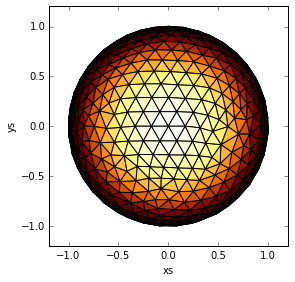

In [9]:
axs, artists = b['protomesh'].plot(facecolor='teffs')

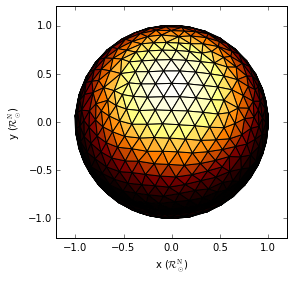

In [10]:
axs, artists = b['pbmesh'].plot(facecolor='teffs')

In [11]:
print "teff: {} ({})".format(b.get_value('teffs', dataset='pbmesh').mean(), 
                             b.get_value('teff', context='component'))

teff: 5772.00000007 (5772.0)


In [12]:
print "rpole: {} ({})".format(b.get_value('rpole', dataset='pbmesh'), 
                              b.get_value('rpole', context='component'))

rpole: 1.0 (1.0)


For a rotating sphere, the minimum radius should occur at the pole and the maximum should occur at the equator.

In [13]:
print "rmin (pole): {} ({})".format(b.get_value('rs', dataset='pbmesh').min(), 
                             b.get_value('rpole', context='component'))

rmin (pole): 1.00000000281 (1.0)


In [14]:
print "rmax (equator): {} (>{})".format(b.get_value('rs', dataset='pbmesh').max(), 
                              b.get_value('rpole', context='component'))

rmax (equator): 1.0000002831 (>1.0)


In [15]:
print "logg: {}".format(b.get_value('loggs', dataset='pbmesh').mean())

logg: 4.43806729869


In [16]:
print "flux: {}".format(b.get_quantity('fluxes@model')[0])

flux: 1357.12228578 W / m2
